In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
Annual_Gold_Value_In_Rubles = pd.read_csv('Resources/output_Annual_Gold_Value_In_Rubles.csv')
Inflation_rates_2013_2021 = pd.read_csv('Resources/inflation_rates_2013-2021.csv')

russian_inflation = Inflation_rates_2013_2021[Inflation_rates_2013_2021['country'] == 'Russian Federation']


In [10]:
def calculate_percent_change(data, year_column, value_column):
    percent_change = {}
    for i in range(1, len(data)):
        old_value = data[value_column].iloc[i - 1]
        new_value = data[value_column].iloc[i]
        print(f"old_value: {old_value}, new_value: {new_value}")
        change = ((new_value - old_value) / old_value) * 100
        percent_change[data[year_column].iloc[i]] = change
    return percent_change

def ruble_inflation_creation(data):
    ruble_inflation_made = {}
    for i in range(len(data)):
        year = data['year'].iloc[i]
        inflation_rate = data['inflation rate'].iloc[i]
        ruble_inflation_made[year] = inflation_rate
    return ruble_inflation_made


In [11]:
ruble_inflation_change = ruble_inflation_creation(Inflation_rates_2013_2021)
percent_change_gold = calculate_percent_change(Annual_Gold_Value_In_Rubles, 'Year', 'Gold_Value_In_Rubles')


old_value: 44791.20054311803, new_value: 47659.876665603166
old_value: 47659.876665603166, new_value: 70151.21571664493
old_value: 70151.21571664493, new_value: 61629.45414798059
old_value: 61629.45414798059, new_value: 73450.440053803
old_value: 73450.440053803, new_value: 79423.06481707597
old_value: 79423.06481707597, new_value: 90385.41280287637
old_value: 90385.41280287637, new_value: 127847.09175307302
old_value: 127847.09175307302, new_value: 132566.23276479746
old_value: 132566.23276479746, new_value: 121960.76280708624


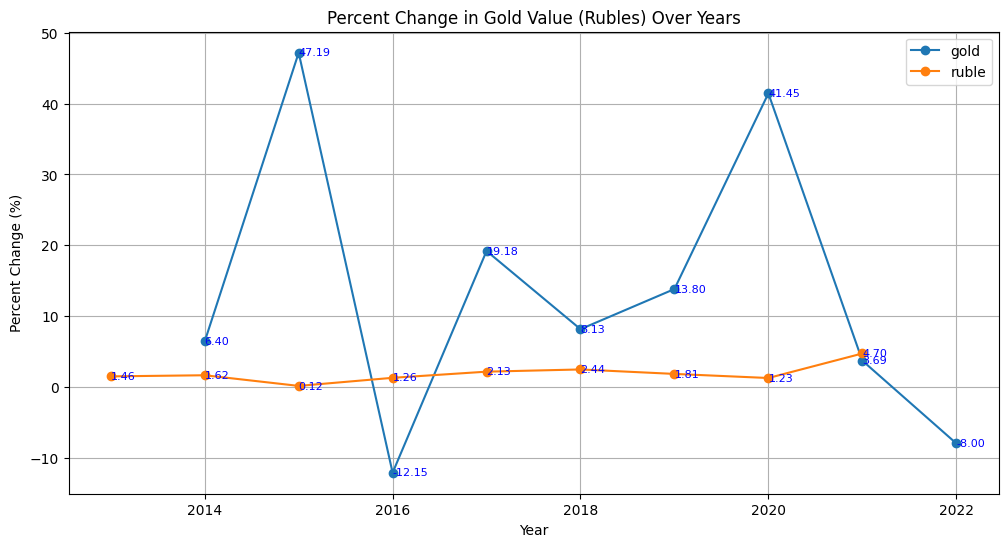

In [12]:
plt.figure(figsize=(12, 6), label = 'InPercetages')

plt.plot(percent_change_gold.keys(), percent_change_gold.values(), marker='o', linestyle='-', label='gold')
plt.plot(ruble_inflation_change.keys(), ruble_inflation_change.values(), marker='o', linestyle='-', label='ruble')

for year, rate in percent_change_gold.items():
    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
for year, rate in ruble_inflation_change.items():
    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')

plt.title('Percent Change in Gold Value (Rubles) Over Years')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True)
plt.show()